## 데이터랩 이용

    최초 작성일 : 20/03/27
    작성자 : 조예슬

    설문지 연령 + 성별로 가장 많은 그룹 선출
    각 그룹의 패션의 관심도 비교하여
    패션 관심도에 따라 퍼스널 컬러를 잘 알 것 이라는 가정 세우고
    
    '네이버 데이터랩'의 자료를 사용하여 가정을 증명할 만한 데이터 가져오기
    
    < 작성 내용 >
        - Sex + Age 분포 
        - 20대 여성, 남성의 패션 관심도 분포
        
    < 수정 내용 >
        - 20대 여성의 퍼스널컬러 검색수 년도별 변화
        - 20대 남성의 퍼스널컬러 검색수 년도별 변화

### Sex + Age  분포 알아보기

In [2]:
# 데이터 불러오기

SA_total <- read.csv("C:/Users/cho ye seul/Documents/예슬/Acorn/FinalProject/Statistical Analysis/SA_total.csv")
str(SA_total)
# head(SA_total)

## 데이터프레임 재생성

# teenth
teenth_F <- with(SA_total, sum(cnt[sex == "Female" & age_class == "10"]))
teenth_M <- with(SA_total, sum(cnt[sex == "Male" & age_class == "10"]))

# twenty
twenty_F <- with(SA_total, sum(cnt[sex == "Female" & age_class == "20"]))
twenty_M <- with(SA_total, sum(cnt[sex == "Male" & age_class == "20"]))

# thirty
thirty_F <- with(SA_total, sum(cnt[sex == "Female" & age_class == "30"]))
thirty_M <- with(SA_total, sum(cnt[sex == "Male" & age_class == "30"]))

# forty
forty_F <- with(SA_total, sum(cnt[sex == "Female" & age_class == "40"]))
forty_M <- with(SA_total, sum(cnt[sex == "Male" & age_class == "40"]))

# fifty
fifty_F <- with(SA_total, sum(cnt[sex == "Female" & age_class == "50"]))
fifty_M <- with(SA_total, sum(cnt[sex == "Male" & age_class == "50"]))

teenth <- c(teenth_M, teenth_F)
twenty <- c(twenty_M, twenty_F)
thirty <- c(thirty_M, thirty_F)
forty <- c(forty_M, forty_F)
fifty <- c(fifty_M, fifty_F)

df_SA_cnt <- data.frame(teenth, twenty, thirty, forty, fifty)
df_SA_cnt <- t(df_SA_cnt)
colnames(df_SA_cnt) <- c("Male", "Female")

df_SA_cnt

'data.frame':	210 obs. of  4 variables:
 $ X        : int  0 1 2 3 4 5 6 7 8 9 ...
 $ sex      : Factor w/ 2 levels "Female","Male": 2 1 1 1 1 1 1 2 1 1 ...
 $ age_class: int  20 20 20 20 20 20 20 20 20 20 ...
 $ cnt      : int  1 1 1 1 1 1 1 1 1 1 ...


,Male,Female
teenth,1,7
twenty,47,108
thirty,8,22
forty,2,4
fifty,3,8


#### 자료 분석

    설문조사 연령대는 20대가 가장 많음
    조원들의 평균 연령대가 20대 중후반이여서 아무래도 20대 인맥이 많음
    
    성별로 비교해보면 남성보다 여성의 수가 더 많음
    남성보단 여성이 퍼스널 컬러에 더 관심이 많다보니 
    여성들이 흥미를 가지고 참여를 더 많이 했을 것으로 사료됨

    (개발 과정에 있어서 20대 여성의 데이터를 중점적으로 분석해도 될 것이라 사료됨)

### 20대 여성, 남성의 패션 관심도(개수 & 백분율)

In [4]:
# 데이터 불러오기

AgeSexInterest <- read.csv("C:/Users/cho ye seul/Documents/예슬/Acorn/FinalProject/Statistical Analysis/AgeSexInterest.csv")
# str(AgeSexInterest)
# head(AgeSexInterest)


# 20대 여성, 남성의 패션 관심도 개수로 나타내기

Female_I <- c()
Male_I <- c()

for(i in seq(1,5, by=1)){
    F_I <- with(AgeSexInterest, (sum(cnt[sex == "Female" & age_class == "20" & interest == i])))
    Female_I[[i]] <- F_I     
    
    M_I <- with(AgeSexInterest, (sum(cnt[sex == "Male" & age_class == "20" & interest == i])))
    Male_I[[i]] <- M_I     
    
    
    FM_interest_cnt <- data.frame(Female = Female_I, Male = Male_I)
}

rownames(FM_interest_cnt) <- c("Interest1", "Interest2", "Interest3", "Interest4", "Interest5")
FM_interest_cnt


# 20대 여성, 남성의 패션 관심도 백분율로 나타내기

Female_I <- c()
Male_I <- c()

for(i in seq(1,5, by=1)){
    F_I <- with(AgeSexInterest, round((sum(cnt[sex == "Female" & age_class == "20" & interest == i]))/df_SA_cnt[2,2]*100))
    Female_I[[i]] <- F_I     
    
    M_I <- with(AgeSexInterest, round((sum(cnt[sex == "Male" & age_class == "20" & interest == i]))/df_SA_cnt[2,1]*100))
    Male_I[[i]] <- M_I     
    
    
    FM_interest <- data.frame(Female = Female_I, Male = Male_I)
}

rownames(FM_interest) <- c("Interest1(%)", "Interest2(%)", "Interest3(%)", "Interest4(%)", "Interest5(%)")
FM_interest

,Female,Male
Interest1,2,3
Interest2,8,9
Interest3,45,14
Interest4,36,10
Interest5,17,11


,Female,Male
Interest1(%),2,6
Interest2(%),7,19
Interest3(%),42,30
Interest4(%),33,21
Interest5(%),16,23


#### 결과 해석

    백분율로 보았을때,
    여성 패션 관심도 3, 4 많이 차지
    남성 패션 관심도 3, 4, 5 많이 차지

### 20대 여성, 남성에 따라 퍼스널컬러 검색수 알아보기

In [1]:
# 데이터 불러오기

search_s_cnt <- read.csv("C:/Users/cho ye seul/Documents/예슬/Acorn/FinalProject/Statistical Analysis/search_s_cnt.csv")
str(search_s_cnt)
head(search_s_cnt)

'data.frame':	3094 obs. of  6 variables:
 $ X        : int  0 1 2 3 4 5 6 7 8 9 ...
 $ Year     : int  2016 2016 2016 2016 2016 2016 2016 2016 2016 2016 ...
 $ Month    : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Day      : int  1 2 3 4 5 6 7 8 9 10 ...
 $ sex_class: Factor w/ 2 levels "Female","Male": 1 1 1 1 1 1 1 1 1 1 ...
 $ cnt      : num  878 932 968 1017 902 ...


X,Year,Month,Day,sex_class,cnt
0,2016,1,1,Female,878
1,2016,1,2,Female,932
2,2016,1,3,Female,968
3,2016,1,4,Female,1017
4,2016,1,5,Female,902
5,2016,1,6,Female,1022


In [52]:
## 20대 여성 한달 단위로 알아본 퍼스널컬러 검색수(전체)
## dataframe 생성

example_i <- c()
month_i <- c()
year_j <- c()
df_F <- c()
sex_i <- c()

for(j in seq(2016, 2020, by=1)){
    for (i in seq(1, 12, by=1)){
        example <- with(search_s_cnt, 
                       round(mean(cnt[(sex_class == "Female") & (Year == j) & (Month == i)])))
        year_j[[(i)]] <- c(j)
        month_i[[(i)]] <- c(i)
        example_i[[(i)]] <- example
        sex_i[[(i)]] <- c("Female")
        df_f <- data.frame(sex=sex_i, year=year_j, month=month_i, cnt=example_i)
    }
    df_F <- rbind(df_F, df_f)
    df_F <- na.omit(df_F)
}

df_F

sex,year,month,cnt
Female,2016,1,1164
Female,2016,2,943
Female,2016,3,648
Female,2016,4,661
Female,2016,5,519
Female,2016,6,578
Female,2016,7,760
Female,2016,8,800
Female,2016,9,922
Female,2016,10,860


In [65]:
## 20대 여성 한달 단위로 알아본 퍼스널컬러 검색수(년도별)
## dataframe 생성

example_i <- c()
month_i <- c()
year_j <- c()
df_F <- c()
sex_i <- c()

# 2016
for(j in 2016){
    for (i in seq(1, 12, by=1)){
        example <- with(search_s_cnt, 
                       round(mean(cnt[(sex_class == "Female") & (Year == j) & (Month == i)])))
        year_j[[(i)]] <- c(j)
        month_i[[(i)]] <- c(i)
        example_i[[(i)]] <- example
        sex_i[[(i)]] <- c("Female")
        df_f <- data.frame(sex=sex_i, year=year_j, month=month_i, cnt=example_i)
    }
    df_F <- na.omit(df_f)
    df_16 <- df_F
}
df_16

# 2017
for(j in 2017){
    for (i in seq(1, 12, by=1)){
        example <- with(search_s_cnt, 
                       round(mean(cnt[(sex_class == "Female") & (Year == j) & (Month == i)])))
        year_j[[(i)]] <- c(j)
        month_i[[(i)]] <- c(i)
        example_i[[(i)]] <- example
        sex_i[[(i)]] <- c("Female")
        df_f <- data.frame(sex=sex_i, year=year_j, month=month_i, cnt=example_i)
    }
    df_F <- na.omit(df_f)
    df_17 <- df_F
}
df_17

# 2018
for(j in 2018){
    for (i in seq(1, 12, by=1)){
        example <- with(search_s_cnt, 
                       round(mean(cnt[(sex_class == "Female") & (Year == j) & (Month == i)])))
        year_j[[(i)]] <- c(j)
        month_i[[(i)]] <- c(i)
        example_i[[(i)]] <- example
        sex_i[[(i)]] <- c("Female")
        df_f <- data.frame(sex=sex_i, year=year_j, month=month_i, cnt=example_i)
    }
    df_F <- na.omit(df_f)
    df_18 <- df_F
}
df_18


# 2019
for(j in 2019){
    for (i in seq(1, 12, by=1)){
        example <- with(search_s_cnt, 
                       round(mean(cnt[(sex_class == "Female") & (Year == j) & (Month == i)])))
        year_j[[(i)]] <- c(j)
        month_i[[(i)]] <- c(i)
        example_i[[(i)]] <- example
        sex_i[[(i)]] <- c("Female")
        df_f <- data.frame(sex=sex_i, year=year_j, month=month_i, cnt=example_i)
    }
    df_F <- na.omit(df_f)
    df_19 <- df_F
}
df_19

# 2020
for(j in 2020){
    for (i in seq(1, 12, by=1)){
        example <- with(search_s_cnt, 
                       round(mean(cnt[(sex_class == "Female") & (Year == j) & (Month == i)])))
        year_j[[(i)]] <- c(j)
        month_i[[(i)]] <- c(i)
        example_i[[(i)]] <- example
        sex_i[[(i)]] <- c("Female")
        df_f <- data.frame(sex=sex_i, year=year_j, month=month_i, cnt=example_i)
    }
    df_F <- na.omit(df_f)
    df_20 <- df_F
}
df_20

sex,year,month,cnt
Female,2016,1,1164
Female,2016,2,943
Female,2016,3,648
Female,2016,4,661
Female,2016,5,519
Female,2016,6,578
Female,2016,7,760
Female,2016,8,800
Female,2016,9,922
Female,2016,10,860


sex,year,month,cnt
Female,2017,1,955
Female,2017,2,899
Female,2017,3,835
Female,2017,4,753
Female,2017,5,728
Female,2017,6,741
Female,2017,7,782
Female,2017,8,790
Female,2017,9,976
Female,2017,10,810


sex,year,month,cnt
Female,2018,1,786
Female,2018,2,964
Female,2018,3,863
Female,2018,4,783
Female,2018,5,725
Female,2018,6,770
Female,2018,7,624
Female,2018,8,667
Female,2018,9,687
Female,2018,10,710


sex,year,month,cnt
Female,2019,1,789
Female,2019,2,830
Female,2019,3,757
Female,2019,4,659
Female,2019,5,615
Female,2019,6,579
Female,2019,7,544
Female,2019,8,717
Female,2019,9,881
Female,2019,10,1031


sex,year,month,cnt
Female,2020,1,1187
Female,2020,2,1455
Female,2020,3,1157


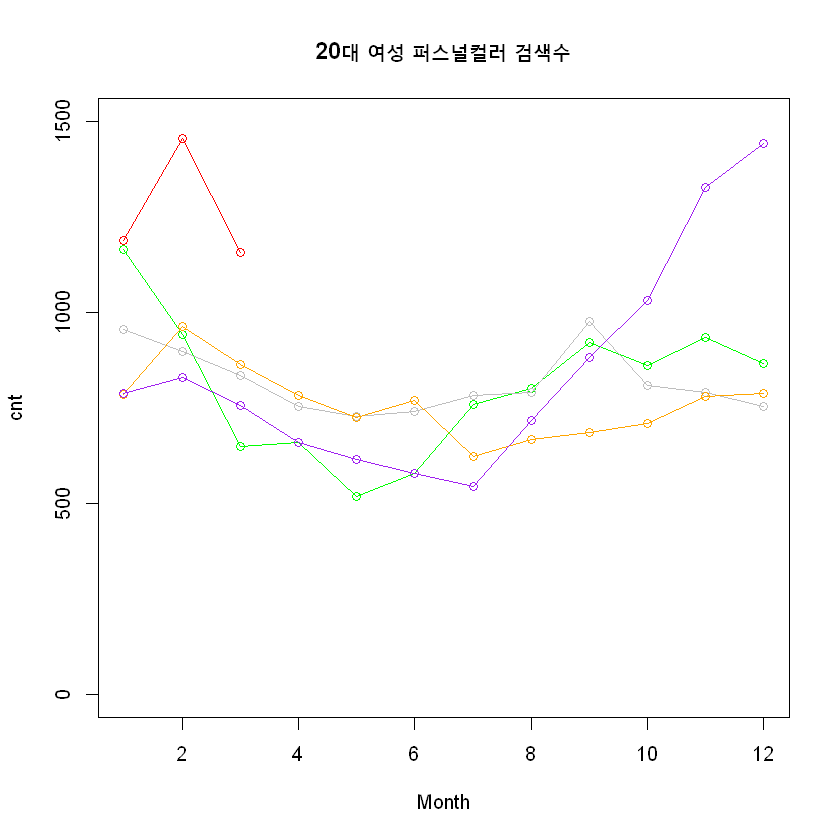

In [66]:
## 20대 여성 한달 단위로 알아본 퍼스널컬러 검색수(년도별)
## 시각화

plot(df_16$month, df_16$cnt, type='o', lty=1, col='green', ylim=c(0,1500), xlab="Month", ylab="cnt", main="20대 여성 퍼스널컬러 검색수")
lines(df_17$month, df_17$cnt, type='o', lty=1, col='gray')
lines(df_18$month, df_18$cnt, type='o', lty=1, col='orange')
lines(df_19$month, df_19$cnt, type='o', lty=1, col='purple')
lines(df_20$month, df_20$cnt, type='o', lty=1, col='red')

#### 결과 해석

    해가 지날수록 검색수가 높아짐
    연말과 연초에 검색량이 많아지는 것을 볼 수 있음

In [67]:
## 20대 남성 한달 단위로 알아본 퍼스널컬러 검색수(전체)
## dataframe 생성

example_i <- c()
month_i <- c()
year_j <- c()
df_F <- c()
sex_i <- c()

for(j in seq(2016, 2020, by=1)){
    for (i in seq(1, 12, by=1)){
        example <- with(search_s_cnt, 
                       round(mean(cnt[(sex_class == "Male") & (Year == j) & (Month == i)])))
        year_j[[(i)]] <- c(j)
        month_i[[(i)]] <- c(i)
        example_i[[(i)]] <- example
        sex_i[[(i)]] <- c("Male")
        df <- data.frame(sex=sex_i, year=year_j, month=month_i, cnt=example_i)
    }
    df_M <- rbind(df_M, df)
    df_M <- na.omit(df_M)
}

df_M

sex,year,month,cnt
Male,2020,1,230
Male,2020,2,255
Male,2020,3,241
Male,2016,1,92
Male,2016,2,75
Male,2016,3,81
Male,2016,4,80
Male,2016,5,77
Male,2016,6,69
Male,2016,7,84


In [68]:
## 20대 남성 한달 단위로 알아본 퍼스널컬러 검색수(년도별)
## dataframe 생성

example_i <- c()
month_i <- c()
year_j <- c()
df_F <- c()
sex_i <- c()

# 2016
for(j in 2016){
    for (i in seq(1, 12, by=1)){
        example <- with(search_s_cnt, 
                       round(mean(cnt[(sex_class == "Male") & (Year == j) & (Month == i)])))
        year_j[[(i)]] <- c(j)
        month_i[[(i)]] <- c(i)
        example_i[[(i)]] <- example
        sex_i[[(i)]] <- c("Male")
        df <- data.frame(sex=sex_i, year=year_j, month=month_i, cnt=example_i)
    }
    df_M <- na.omit(df)
    df_M16 <- df_M
}
df_M16

# 2017
for(j in 2017){
    for (i in seq(1, 12, by=1)){
        example <- with(search_s_cnt, 
                       round(mean(cnt[(sex_class == "Male") & (Year == j) & (Month == i)])))
        year_j[[(i)]] <- c(j)
        month_i[[(i)]] <- c(i)
        example_i[[(i)]] <- example
        sex_i[[(i)]] <- c("Male")
        df <- data.frame(sex=sex_i, year=year_j, month=month_i, cnt=example_i)
    }
    df_M <- na.omit(df)
    df_M17 <- df_M
}
df_M17

# 2018
for(j in 2018){
    for (i in seq(1, 12, by=1)){
        example <- with(search_s_cnt, 
                       round(mean(cnt[(sex_class == "Male") & (Year == j) & (Month == i)])))
        year_j[[(i)]] <- c(j)
        month_i[[(i)]] <- c(i)
        example_i[[(i)]] <- example
        sex_i[[(i)]] <- c("Male")
        df <- data.frame(sex=sex_i, year=year_j, month=month_i, cnt=example_i)
    }
    df_M <- na.omit(df)
    df_M18 <- df_M
}
df_M18


# 2019
for(j in 2019){
    for (i in seq(1, 12, by=1)){
        example <- with(search_s_cnt, 
                       round(mean(cnt[(sex_class == "Male") & (Year == j) & (Month == i)])))
        year_j[[(i)]] <- c(j)
        month_i[[(i)]] <- c(i)
        example_i[[(i)]] <- example
        sex_i[[(i)]] <- c("Male")
        df <- data.frame(sex=sex_i, year=year_j, month=month_i, cnt=example_i)
    }
    df_M <- na.omit(df)
    df_M19 <- df_M
}
df_M19

# 2020
for(j in 2020){
    for (i in seq(1, 12, by=1)){
        example <- with(search_s_cnt, 
                       round(mean(cnt[(sex_class == "Male") & (Year == j) & (Month == i)])))
        year_j[[(i)]] <- c(j)
        month_i[[(i)]] <- c(i)
        example_i[[(i)]] <- example
        sex_i[[(i)]] <- c("Male")
        df <- data.frame(sex=sex_i, year=year_j, month=month_i, cnt=example_i)
    }
    df_M <- na.omit(df)
    df_M20 <- df_M
}
df_M20


sex,year,month,cnt
Male,2016,1,92
Male,2016,2,75
Male,2016,3,81
Male,2016,4,80
Male,2016,5,77
Male,2016,6,69
Male,2016,7,84
Male,2016,8,78
Male,2016,9,87
Male,2016,10,105


sex,year,month,cnt
Male,2017,1,107
Male,2017,2,113
Male,2017,3,106
Male,2017,4,101
Male,2017,5,113
Male,2017,6,112
Male,2017,7,108
Male,2017,8,109
Male,2017,9,126
Male,2017,10,112


sex,year,month,cnt
Male,2018,1,115
Male,2018,2,166
Male,2018,3,152
Male,2018,4,136
Male,2018,5,174
Male,2018,6,214
Male,2018,7,128
Male,2018,8,121
Male,2018,9,131
Male,2018,10,164


sex,year,month,cnt
Male,2019,1,141
Male,2019,2,147
Male,2019,3,170
Male,2019,4,160
Male,2019,5,153
Male,2019,6,136
Male,2019,7,138
Male,2019,8,157
Male,2019,9,236
Male,2019,10,218


sex,year,month,cnt
Male,2020,1,230
Male,2020,2,255
Male,2020,3,241


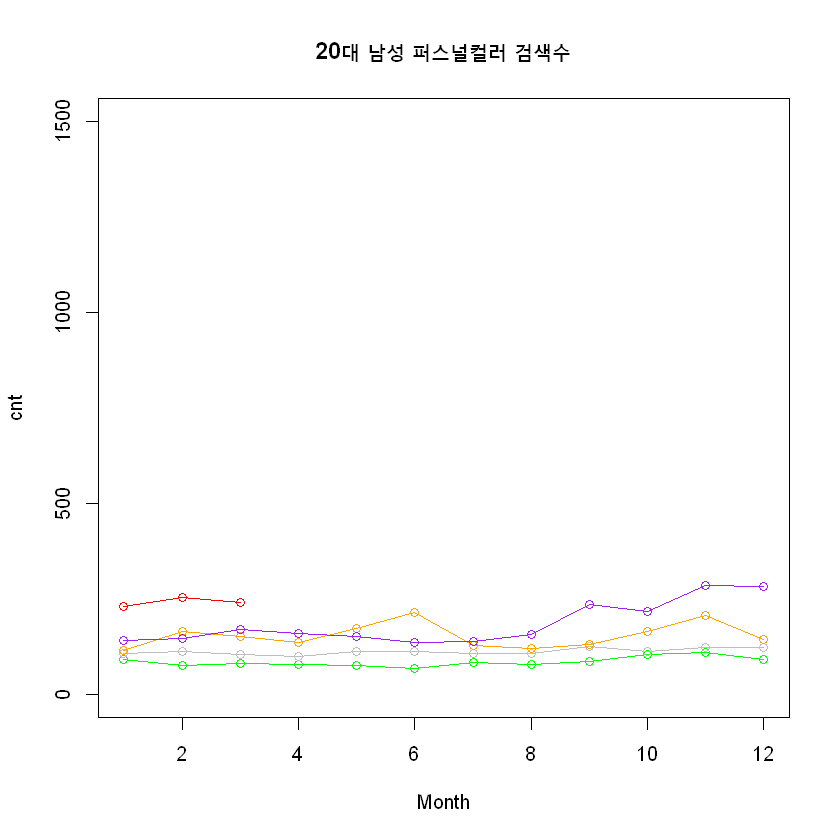

In [69]:
## 20대 남성 한달 단위로 알아본 퍼스널컬러 검색수(년도별)
## 시각화

plot(df_M16$month, df_M16$cnt, type='o', lty=1, col='green', ylim=c(0,1500), xlab="Month", ylab="cnt", main="20대 남성 퍼스널컬러 검색수")
lines(df_M17$month, df_M17$cnt, type='o', lty=1, col='gray')
lines(df_M18$month, df_M18$cnt, type='o', lty=1, col='orange')
lines(df_M19$month, df_M19$cnt, type='o', lty=1, col='purple')
lines(df_M20$month, df_M20$cnt, type='o', lty=1, col='red')

#### 결과 해석

    해가 지날수록 검색수가 높아짐
    20대 여성보다는 검색량이 적음을 볼 수 있음